# Exploratory analysis

After some basic visualizations I came to conclusion that points might represent positions of objects divided into 19 classes on some rectangular image (given the information i have read in presentation, objects might be slide elements positioned on a slide).
My approach to clustering is:
* Convert points to pixels of a low resolution binary image with 19 channels (very loosely inspired by [Point Cloud Labeling using 3D Convolutional Neural Network](http://www.cvlibs.net/projects/autonomous_vision_survey/literature/Huang2016ICPR.pdf)). If there is one or more points in some pixel position - I set channel corresponding to point's class to 1, everything else is set to 0.
* Train convolutional autoencoder to project an image to a lower-dimensional space ([train.py](./train.py)).
* Perform clustering of vectors in that space ([clustering.ipynb](./clustering.ipynb)).

In [1]:
from data_loader import DataLoader
import matplotlib.pyplot as plt
import utils
import itertools

%load_ext autoreload
%autoreload 2

/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dl = DataLoader('./data/dataset')
print('len: {}'.format(len(dl)))
print('num_classes: {}'.format(dl.num_classes))

len: 1159
num_classes: 19


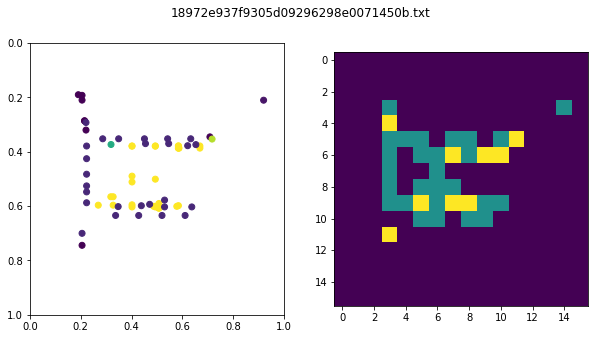

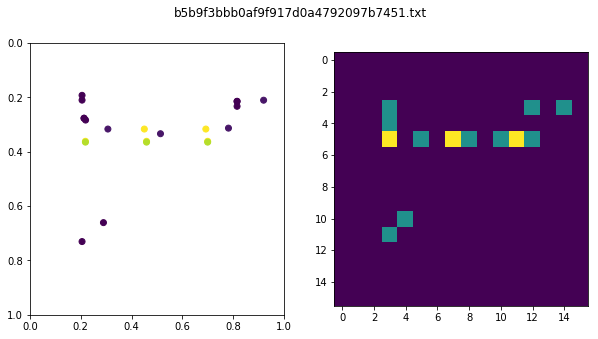

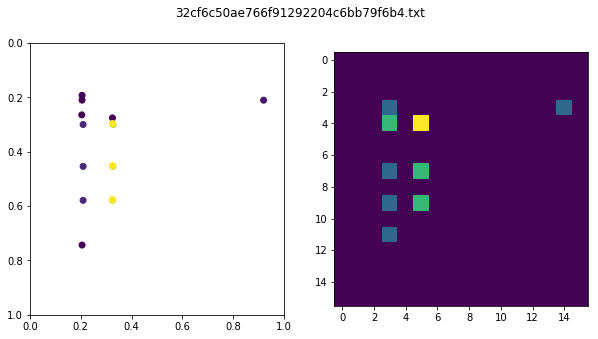

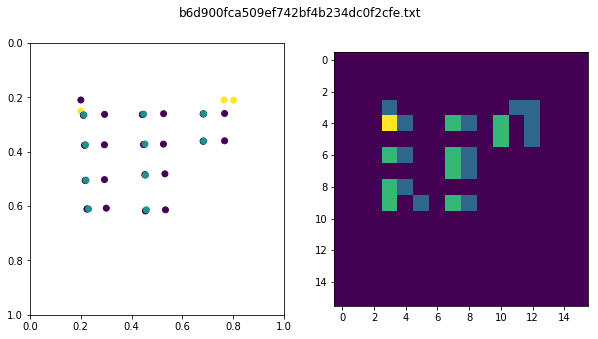

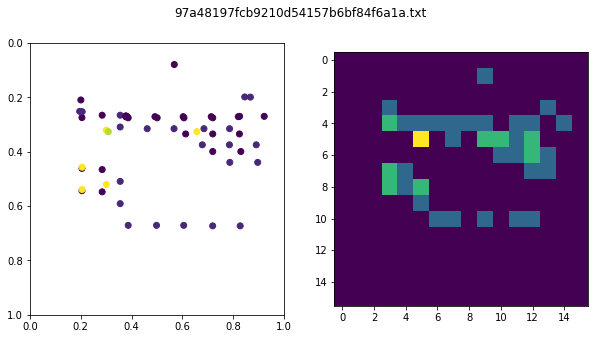

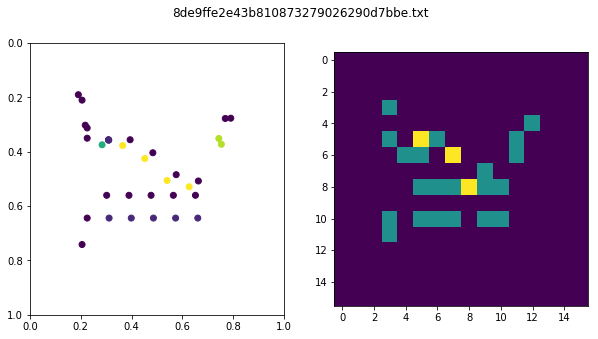

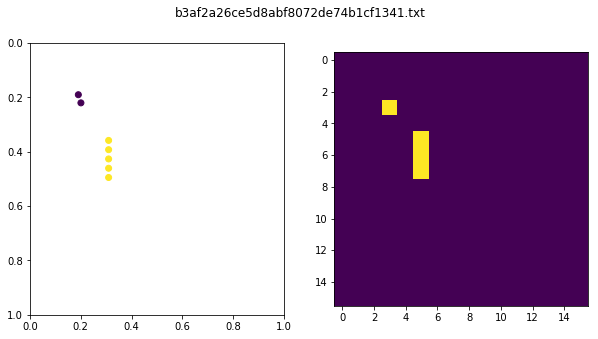

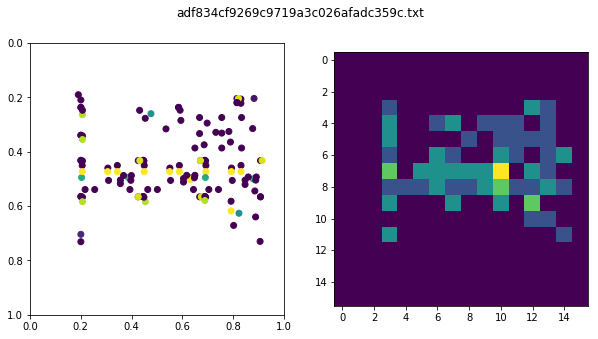

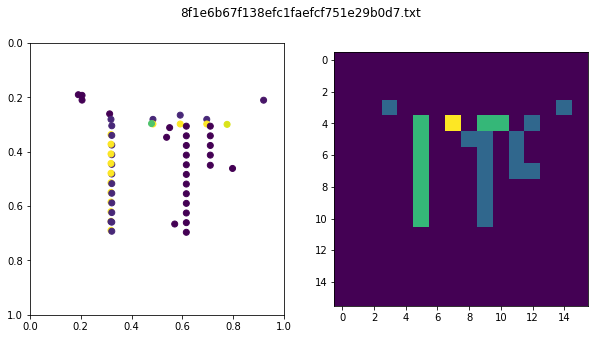

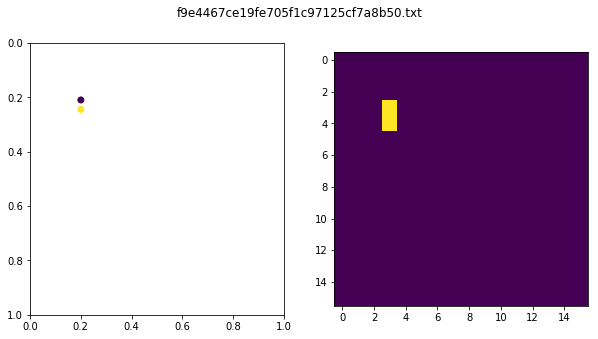

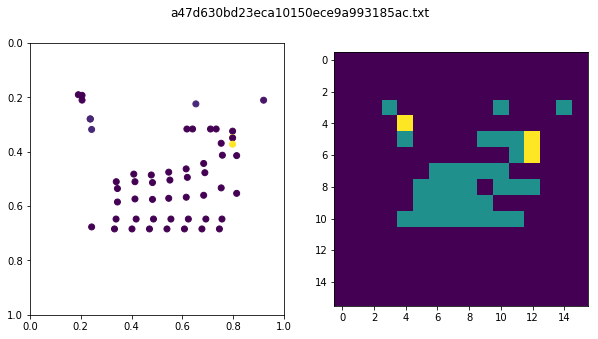

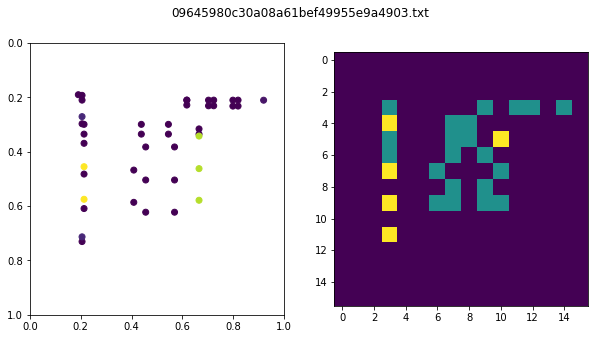

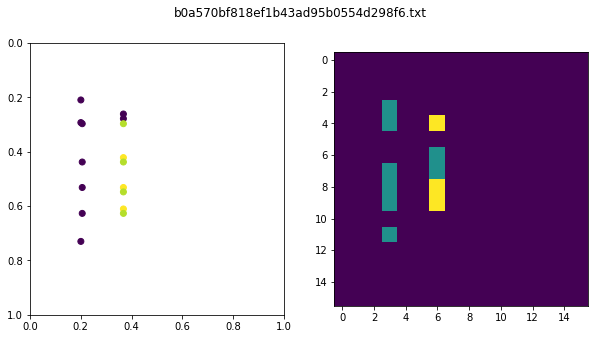

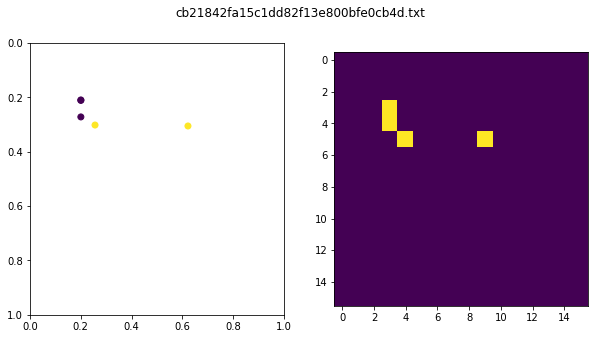

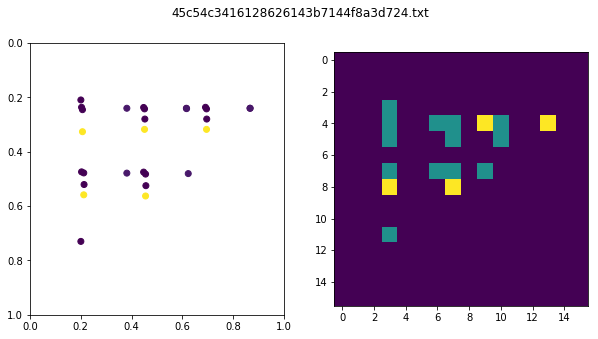

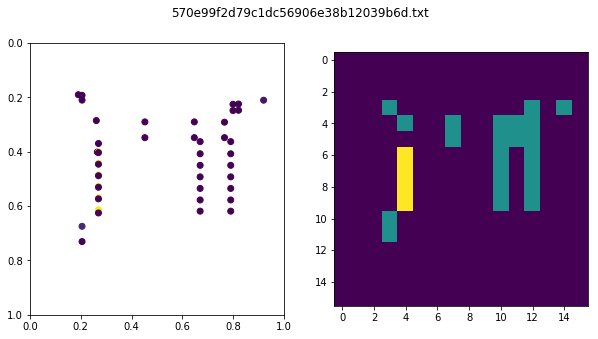

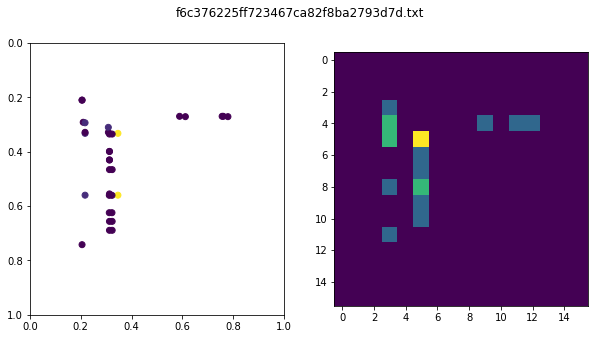

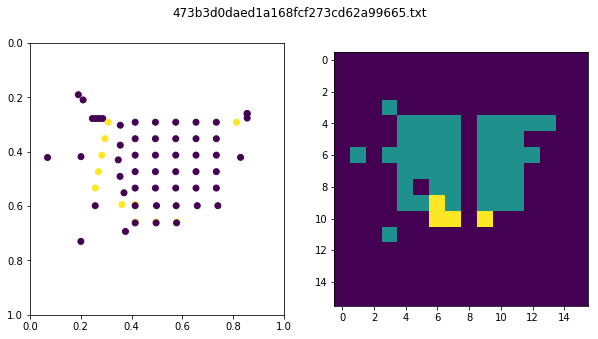

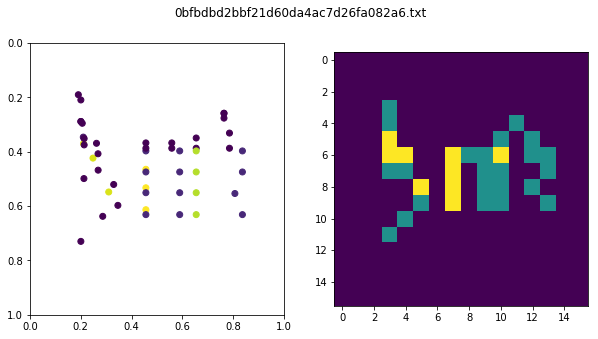

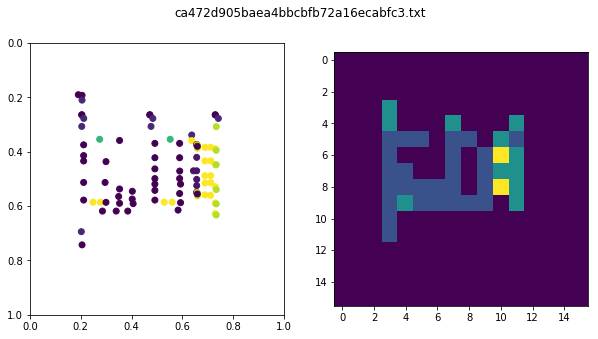

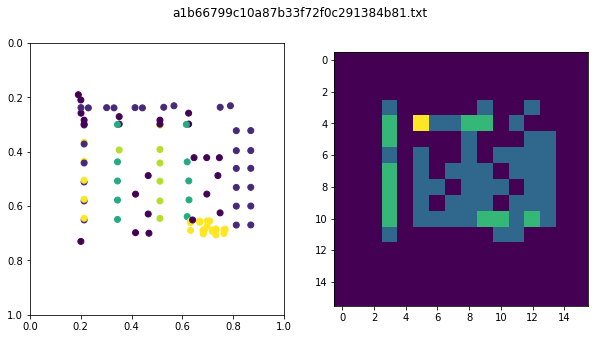

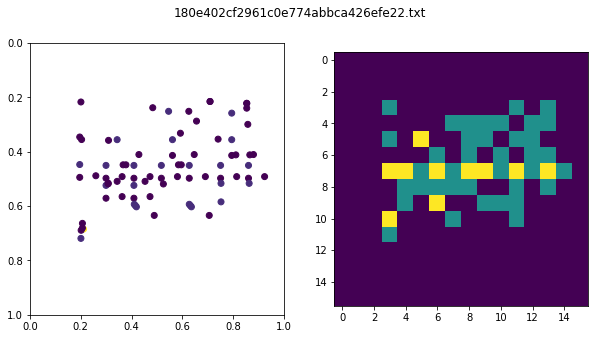

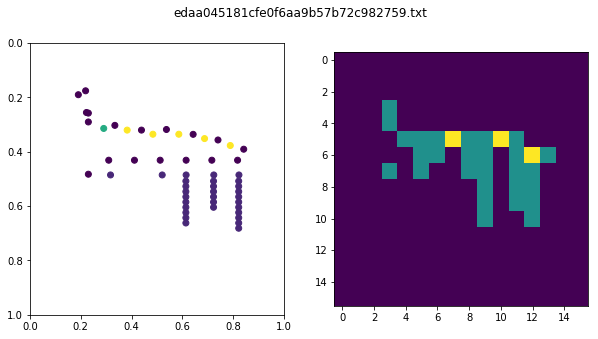

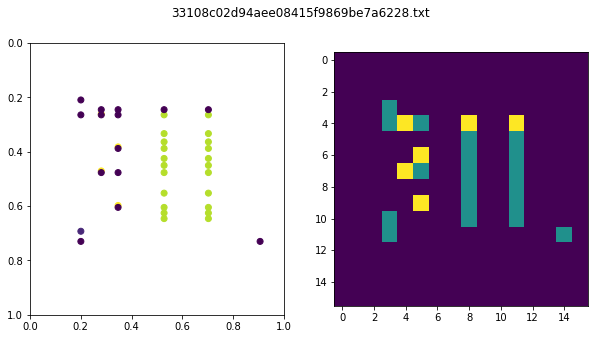

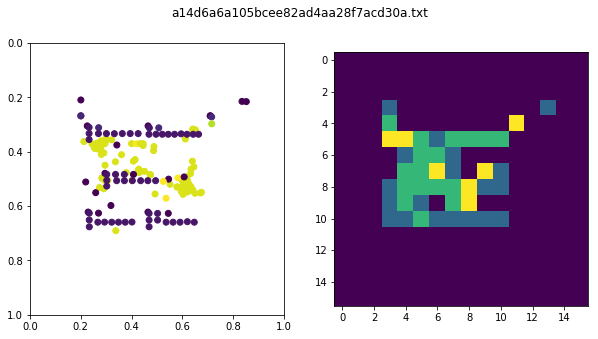

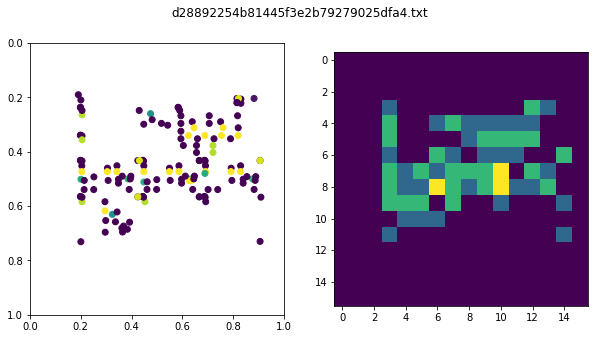

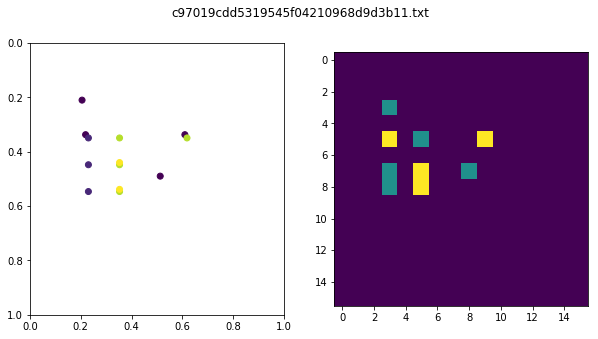

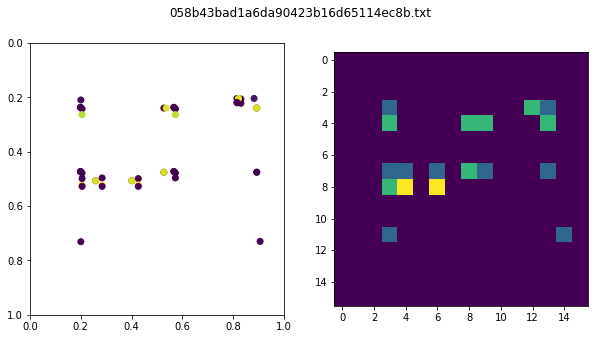

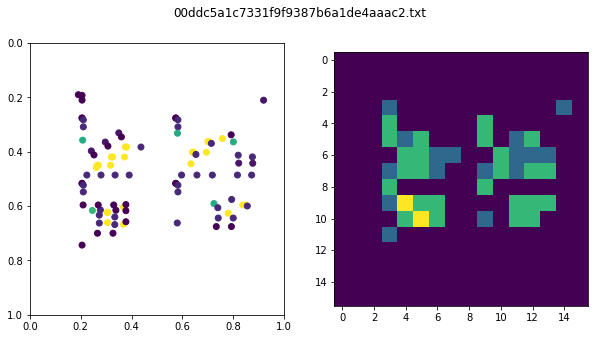

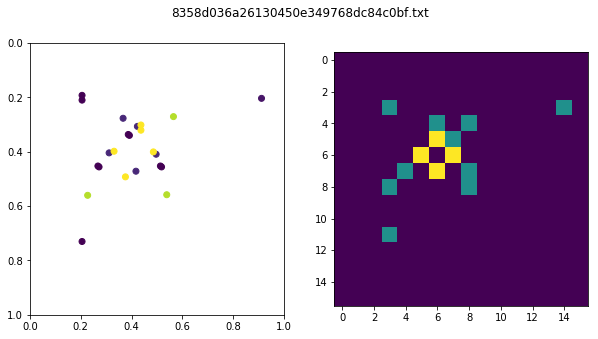

In [3]:
for input in itertools.islice(dl,30):
    points = input['points']
    class_ids = input['class_ids']
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.ylim(0,1)     
    plt.xlim(0,1)
    plt.gca().invert_yaxis()
    plt.scatter(points[:, 0], points[:,1], c=class_ids)
    plt.subplot(1, 2, 2)
    image = utils.points_to_image(points, class_ids, dl.num_classes, (16,16))
    plt.imshow(image.sum(-1))
    plt.suptitle(input['file'])
    plt.show()